In [60]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [64]:
def compute_mse(y, tx, w):
    N = tx.shape[0]
    e = y - np.dot(tx, w)
    loss = 1/(2*N) * np.dot(e.T, e)
    return loss

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w_star = np.linalg.inv(np.dot(tx.T, tx)).dot(tx.T).dot(y)
    mse = compute_mse(y, tx, w_star)
    return mse, w_star

def least_squares_solve(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    A = np.dot(tx.T, tx)
    b = np.dot(tx.T, y)
    
    w_star = np.linalg.solve(A, b)
    mse = compute_mse(y, tx, w_star)
    return mse, w_star

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [20]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    print('Mean square error:')
    %time least_squares(y, tx)
    mse_ls, w_ls = least_squares(y, tx)
    print('loss:', mse_ls)
    print('weighths:', w_ls)
    print()
    
    
    print('Mean square error (with solver):')
    %time least_squares_solve(y, tx)
    mse_lss, w_lss = least_squares_solve(y, tx)
    print('loss:', mse_lss)
    print('weighths:', w_lss)
    print()
    
    
    
    # Grid search
    print('Grid search:')
    grid_w0, grid_w1 = generate_w(num_intervals=500)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    mse_gs, w_gs = get_best_parameters(grid_w0, grid_w1, grid_losses)
    
    print('loss:', mse_gs)
    print('weighths:', w_gs)
    print()
    

test_your_least_squares()

Mean square error:
CPU times: user 853 µs, sys: 59 µs, total: 912 µs
Wall time: 428 µs
loss: 15.3858878688
weighths: [ 73.293922    13.47971243]

Mean square error (with solver):
CPU times: user 559 µs, sys: 3 µs, total: 562 µs
Wall time: 288 µs
loss: 15.3858878688
weighths: [ 73.293922    13.47971243]

Grid search:
loss: 15.3979057082
weighths: [73.146292585170357, 13.527054108216447]



## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [67]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [68]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    return np.array([[ x_n ** m for m in range(degree)] for x_n in x])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.7078805834165345
Processing 2th experiment, degree=3, rmse=0.4669819689544141
Processing 3th experiment, degree=7, rmse=0.24969890274508796
Processing 4th experiment, degree=12, rmse=0.24644764660931437


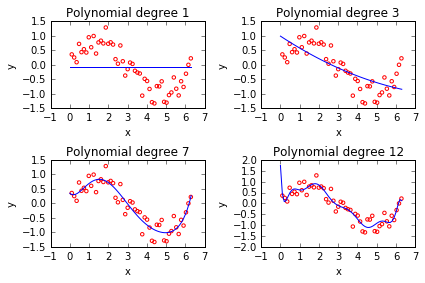

In [77]:
from plots import *

def compute_rmse(y, tx, w):
    return np.sqrt(2 * compute_mse(y, tx, w))

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # form the data to do polynomial regression.
        # ***************************************************
        Øt = build_poly(x, degree)
    
        # ***************************************************
        # least square and calculate rmse
        # ***************************************************       
        _, weight = least_squares_solve(y, Øt) 
        rmse = compute_rmse(y, Øt, weight)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [78]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # split the data based on the given ratio
    # ***************************************************
    
    # Make sure x and y are numpy arrays
    x, y, = np.array(x), np.array(y)
    
    # Generate random indecies
    N = len(y)
    indecies = np.random.permutation(N)
    
    # Split the indecies based on the given ratio
    split = int(N * ratio)
    train_indecies = indecies[:split]
    test_indecies = indecies[split:]

    # Use the train-indecies to make the training set 
    train_x = x[train_indecies]
    train_y = y[train_indecies]
    
    # Use the train-indecies to make the training set 
    test_x = x[test_indecies]
    test_y = y[test_indecies]
    
    return (train_x, train_y), (test_x, test_y)

Then, test your `split_data` function below.

In [80]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # split the data, and return train and test data
    # ***************************************************
    
    train_data, test_data = split_data(x, y, ratio, seed)
    
    train_x, train_y = train_data
    test_x, test_y = test_data

    # ***************************************************
    # form train and test data with polynomial basis function
    # ***************************************************
    train_Ø = build_poly(train_x, degree)
    test_Ø = build_poly(test_x, degree)
    
    # ***************************************************
    # calcualte weight through least square.:
    # ***************************************************
    _, weight = least_squares_solve(train_y, train_Ø)
    

    # ***************************************************
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = compute_rmse(train_y, train_Ø, weight)
    rmse_te = compute_rmse(test_y, test_Ø, weight)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.734, Testing RMSE=0.403
proportion=0.9, degree=3, Training RMSE=0.487, Testing RMSE=0.211
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.214
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.253
proportion=0.5, degree=1, Training RMSE=0.795, Testing RMSE=0.611
proportion=0.5, degree=3, Training RMSE=0.451, Testing RMSE=0.565
proportion=0.5, degree=7, Training RMSE=0.233, Testing RMSE=0.282
proportion=0.5, degree=12, Training RMSE=0.208, Testing RMSE=0.559
proportion=0.1, degree=1, Training RMSE=0.820, Testing RMSE=0.805
proportion=0.1, degree=3, Training RMSE=0.279, Testing RMSE=0.686
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.627
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=1.582


# Ridge Regression
Please fill in the function below.

In [131]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # ridge regression
    # ***************************************************
    N = tx.shape[0]
    M = tx.shape[1]
    
    A = np.dot(tx.T, tx + 2*N*lamb)
    b = np.dot(tx.T, y)
    
    w_star = np.linalg.solve(A, b)
    return w_star

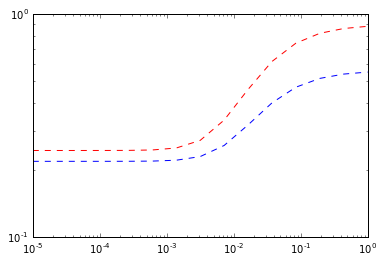

In [164]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # ***************************************************
    # split the data, and return train and test data
    # ***************************************************
    train_data, test_data = split_data(x, y, ratio, seed)
    
    x_train, y_train = train_data
    x_test, y_test = test_data
    
    # ***************************************************
    # form train and test data with polynomial basis function
    # ***************************************************
    ø_train = build_poly(x_train, degree)
    ø_test = build_poly(x_test, degree)
    
    # ***************************************************
    # ridge regression with different lambda
    # ***************************************************

    train_weights = [ridge_regression(y_train, ø_train, lamb) for lamb in lambdas]
    train_rmses = [compute_rmse(y_train, ø_train, weight) for weight in train_weights ]
    
    test_weights = [ridge_regression(y_test, ø_test, lamb) for lamb in lambdas]
    test_rmses = [compute_rmse(y_test, ø_test, weight) for weight in test_weights ]

    plt.loglog(lambdas, train_rmses, 'b--', lambdas, test_rmses, 'r--')

seed = 18
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)